<a href="https://colab.research.google.com/github/ishwarvenugopal/CE888_Data_Science_and_Decision_Making/blob/master/Project/Assignment_2/Assignment2_Dataset_3_HighImbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score

## Load Data

In [5]:
df=pd.read_csv('/content/Dataset_3_high.csv')
df=df.drop('Unnamed: 0',axis=1)
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [0]:
#Rearranging the columns such that the class attributes become the last column

cols=list(df.columns)
cols= cols[:1] + cols[2:] + [cols[1]]
df=df[cols]

In [7]:
columns=df.columns
columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'target'],


## Defining Train and Test Data

In [0]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

## Baseline 1: Decision Tree 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114666
           1       0.00      0.00      0.00      4377

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



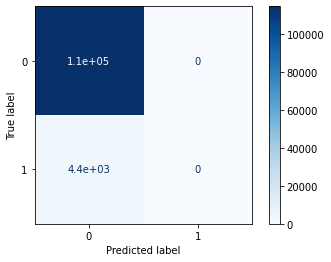

In [10]:
clf_dt=DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=2, min_samples_leaf=4)
clf_dt.fit(X_train,y_train)
y_predict=clf_dt.predict(X_test)
plot_confusion_matrix(clf_dt,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [11]:
score1=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1))

score2 = cross_val_score(clf_dt, X_train, y_train, cv=5)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2.mean(),score2.std()))

Accuracy (without cross-validation) : 0.9632317733928076
Accuracy (after cross-validation): 0.9636326598411378 (+/- 5.083708955268357e-06)


In [12]:
cohen_kappa_score(y_test, y_predict, labels=None, weights=None)

0.0

## Baseline 2: Random Forest

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114666
           1       0.50      0.00      0.00      4377

    accuracy                           0.96    119043
   macro avg       0.73      0.50      0.49    119043
weighted avg       0.95      0.96      0.95    119043



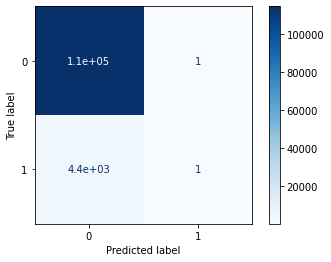

In [13]:
clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [14]:
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

Accuracy (without cross-validation) : 0.9632317733928076
Accuracy (after cross-validation): 0.9636347599314418 (+/- 1.5422809587414153e-05)


In [15]:
cohen_kappa_score(y_test, y_predict, labels=None, weights=None)

0.0004231535345948778

## Partitioning the dataset into 10 bins, keeping the imbalance ratio from the original dataset 

In [22]:
#Original Imbalance

target_count=df['target'].value_counts()
print(target_count)

imbalance_target=(target_count[0]/(target_count[0]+target_count[1]))*100
print(imbalance_target)


0    573518
1     21694
Name: target, dtype: int64
96.3552482140817


In [0]:
def create_bins (df,no_of_bins,orig_imbalance):
  df_class0=df[df['target']==0]
  df_class1=df[df['target']==1]

  len0=int(len(df_class0)/no_of_bins)
  len1=int(len(df_class1)/no_of_bins)

  ind0=0
  ind1=0
  start0=0
  start1=0

  bins=[]

  print("Original Imbalance in the dataset: {} %".format(orig_imbalance))
  for i in range(no_of_bins):
    ind0+=len0
    ind1+=len1
    bin_=pd.concat([df_class1.iloc[start1:ind1,:],df_class0.iloc[start0:ind0,:]])
    target_cnt=bin_['target'].value_counts()
    imbalance=(target_cnt[0]/(target_cnt[0]+target_cnt[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(bin_.values)
    start0+=len0
    start1+=len1

  return bins



In [31]:
bins= create_bins(df,10, imbalance_target) #Partitioning the dataset into 10 bins

Original Imbalance in the dataset: 96.3552482140817 %
Class imbalance ratio in bin 0 : 96.35584677419354 %
Class imbalance ratio in bin 1 : 96.35584677419354 %
Class imbalance ratio in bin 2 : 96.35584677419354 %
Class imbalance ratio in bin 3 : 96.35584677419354 %
Class imbalance ratio in bin 4 : 96.35584677419354 %
Class imbalance ratio in bin 5 : 96.35584677419354 %
Class imbalance ratio in bin 6 : 96.35584677419354 %
Class imbalance ratio in bin 7 : 96.35584677419354 %
Class imbalance ratio in bin 8 : 96.35584677419354 %
Class imbalance ratio in bin 9 : 96.35584677419354 %


In [0]:
model_accuracies={} #A dictionary to save the accuracies for the different permutations of the bins
model_kappa_scores={} #A dictionary to save the cohen kappa scores for the different permutations of the bins

## Analyzing the number of clusters using Elbow method and Silhouette method

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  del sys.path[0]


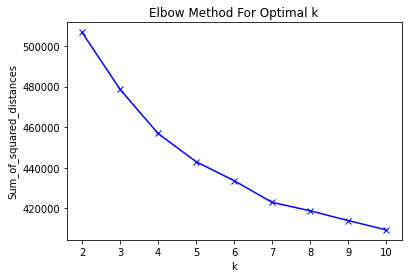

In [44]:
#***** CHANGE MANUALLY DURING EACH ITERATION *****#

i=2 # The bin index to be left-out while training, and used only for testing 

#************************************************#

#CREATE TESTING DATA

leave_out=i #for indexing while saving the model accuracies to a dictionary
test_data=bins[i] 

#CREATE TRAINING DATA

compile9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining data from all other bins except the left-out one
data=pd.DataFrame(compile9)
data.columns=columns
mms=MinMaxScaler() #normalizing the data
mms.fit(data)
data_transformed=mms.transform(data)

#ELBOW METHOD TO IDENTIFY THE NUMBER OF CLUSTERS

Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#SILHOUETTE METHOD TO IDENTIFY THE NUMBER OF CLUSTERS
# K = range(2,11)
# no_of_clusters=[]
# silhouette_scores=[]

# for k in K:
#     km = KMeans(n_clusters=k,random_state=1)
#     preds=km.fit_predict(data_transformed)
#     centers=km.cluster_centers_

#     score=silhouette_score(data_transformed,preds)

#     no_of_clusters.append(k)
#     silhouette_scores.append(score)

# plt.ylabel("Silhouette coefficient")
# plt.xlabel("k")
# plt.title('Silhouette Method For Optimal k')
# plt.bar(no_of_clusters,silhouette_scores)
# plt.show()

In [45]:
#*****CHANGE MANUALLY DURING EACH ITERATION*****#

num_of_clusters=7 #Decided after looking at the plots from the previous cell 

#***********************************************#

min_class=0 # The minority class label
max_class=1 # The majority class label

#***********************************************#

#FITTING A K-MEANS CLUSTERING MODEL

kmeans = KMeans(n_clusters=num_of_clusters, random_state=1)
kmeans.fit_predict(data_transformed)

cluster_df=data
cluster_df["Cluster label"]=kmeans.labels_
cols=list(cluster_df.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
cluster_df=cluster_df[cols]
  
g=globals() #To facilitate naming dynamically

#Filtering out the data belonging to each cluster

for i in range(0,num_of_clusters):
  g['cluster_{}'.format(i)] = cluster_df[cluster_df['Cluster label']==i]

#Checking for number of entries from minority class in each cluster

for i in range(0,num_of_clusters):
  g['clus_{}_class_{}'.format(i,min_class)] = g['cluster_{}'.format(i)][g['cluster_{}'.format(i)]['target']==min_class]
  if (len(g['clus_{}_class_{}'.format(i,min_class)])!=0):
    g['X{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,:-1]
    g['y{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,-1]
    g['clf_{}'.format(i)]=RandomForestClassifier(n_jobs=2,random_state=0)
    g['clf_{}'.format(i)].fit(g['X{}'.format(i)],g['y{}'.format(i)])
    g['Class_val_{}{}'.format(i,min_class)]=min_class
  else:
    g['Class_val_{}{}'.format(i,min_class)]=max_class
  
#CREATING THE TEST DATA

test_cluster=pd.DataFrame(test_data)
test_cluster.columns=df.columns
test_cluster["Cluster label"]=kmeans.predict(test_data)
cols=list(test_cluster.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
test_cluster=test_cluster[cols]

#Dividing the results based on cluster label, to predict the class labels of the corresponding entries

for i in range(0,num_of_clusters):
  g['test_{}'.format(i)] = test_cluster[test_cluster['Cluster label']==i]
  if(len(g['test_{}'.format(i)])!=0):
    if(g['Class_val_{}{}'.format(i,min_class)]==min_class): #Checking if the dataset contains values from both the classes
      g['X_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,:-1]
      g['y_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,-1]
      g['y_pred{}'.format(i)]=g['clf_{}'.format(i)].predict(g['X_test{}'.format(i)])
      g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]
    else:
      g['y_pred{}'.format(i)]=np.full(len(g['test_{}'.format(i)]),max_class)
      g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]

#Compiling the results and predictions for performance checking

final_test=pd.concat([g['test_{}'.format(i)] for i in range(0,num_of_clusters) if(len(g['test_{}'.format(i)])!=0)])
trial_accuracy=accuracy_score(final_test.iloc[:,-2],final_test.iloc[:,-1]) #computing accuracy based on real class labels
print("Accuracy : {}".format(trial_accuracy))

model_accuracies[leave_out]=trial_accuracy #Saving the accuracy for this permutation
trial_kappa =cohen_kappa_score(y_test, y_predict, labels=None, weights=None)
model_kappa_scores[leave_out]=trial_kappa #Saving the cohen kappa score for this permutation

Accuracy : 0.9635584677419354


In [0]:
# model_accuracies

In [0]:
# model_kappa_scores

In [0]:
acc_values=np.array([model_accuracies[k] for k in model_accuracies])
#acc_values

In [55]:
print("Decision Tree model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2.mean(),score2.std()))
print("Random Forest model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))
print("New model:")
print("Accuracy : {} (+/- {})".format(acc_values.mean(),acc_values.std()))

Decision Tree model:
Accuracy (after cross-validation): 0.9636326598411378 (+/- 5.083708955268357e-06)
Random Forest model:
Accuracy (after cross-validation): 0.9636347599314418 (+/- 1.5422809587414153e-05)
New model:
Accuracy : 0.9631216397849461 (+/- 0.0006177680211978861)


In [0]:
kappa_values=np.array([model_kappa_scores[k] for k in model_kappa_scores])
#kappa_values

In [57]:
print("Kappa Scores:")
print("Decision Tree: 0.0")
print("Random Forest: 0.0004231535345948778")
print("New Model: {}".format(kappa_values.mean()))

Kappa Scores:
Decision Tree: 0.0
Random Forest: 0.0004231535345948778
New Model: 0.0004231535345948778
